# CS4035 - Cyber Data Analytics
## Lab 4

### Submit on brightspace (zip file with the name Group_xx.zip)
This jupyter file completed with code, plots, figures and report for each question. Write the code or explanation below each sub question. For the explanations, include what you would normally include in the report for this lab assignment, for example data pre-processing, hypothesis tested, approach, results, etc.

(if you used hard-to-get libraries) The libraries needed to run this file. 

Your peers should be able to use the readme section for instructions and be able to run this file. 

## Group Number :

## Student 1 
### Name :
### ID :

## Student 2
### Name :
### ID :

## README

Provide instructions - libraries used, location of the data file, etc. Keep it short. Remember your peers will not debug your code and should be able to reproduce the exact output you provide.

In [165]:
import os
import nbformat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from typing import Tuple
from rich.table import Table
from rich.progress import track
from rich.console import Console
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

%matplotlib inline

In [166]:
# If this cell does not work try running ``
nb = nbformat.read("Lab4.ipynb", nbformat.NO_CONVERT)
word_count = 0
for cell in nb.cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))

print("Word count:", word_count)

Word count: 834


## 1. Preparation (0 points)

### 1a. Load the dataset and split it into a train and test set

In [167]:
data_X_path = os.path.join(os.getcwd(), "data", "X.npy")
data_y_path = os.path.join(os.getcwd(), "data", "y.npy")
features_path = os.path.join(os.getcwd(), "data", "feature_names.csv")

X = np.load(data_X_path)
y = np.load(data_y_path)

df_feats = pd.read_csv(features_path)

In [168]:
X.shape

(30396, 22761)

In [169]:
data = np.c_[X, y]
data.shape

(30396, 22762)

In [170]:
features = df_feats['feature_name'].tolist()
features.append('label')
df = pd.DataFrame(data=data, columns=features)
df

,kernel32.dll:SetFileTime,kernel32.dll:CompareFileTime,kernel32.dll:SearchPathW,kernel32.dll:GetShortPathNameW,kernel32.dll:GetFullPathNameW,kernel32.dll:MoveFileW,kernel32.dll:SetCurrentDirectoryW,kernel32.dll:GetFileAttributesW,kernel32.dll:GetLastError,kernel32.dll:CreateDirectoryW,...,msvcrt.dll:_wrmdir,wsock32.dll:ntohl,msvcr100.dll:_ismbblead,msvcr100.dll:_acmdln,secur32.dll:LsaFreeReturnBuffer,gdiplus.dll:GdipEmfToWmfBits,gdiplus.dll:GdipAddPathLine2,gdiplus.dll:GdipGetRegionBoundsI,gdiplus.dll:GdipSetPenLineJoin,label
0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30391,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
30392,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
30393,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
30394,0,0,0,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1


In [171]:
split_data = train_test_split(X, y, test_size=0.5, random_state=42)
X_train, X_test, y_train, y_test = split_data

## 2. Attacking linear models (5 Points)

### 2a. Implementing useless import attacks

#### Training regular SGD Classifier

-- Epoch 1
Norm: 147.51, NNZs: 8949, Bias: 9.236085, T: 13678, Avg. loss: 16.160503
Total training time: 0.83 seconds.
-- Epoch 2
Norm: 92.65, NNZs: 8962, Bias: 4.048216, T: 27356, Avg. loss: 2.986621
Total training time: 1.70 seconds.
-- Epoch 3
Norm: 70.29, NNZs: 8962, Bias: 2.521127, T: 41034, Avg. loss: 1.680364
Total training time: 2.57 seconds.
-- Epoch 4
Norm: 59.10, NNZs: 8962, Bias: 2.306985, T: 54712, Avg. loss: 1.234767
Total training time: 3.56 seconds.
-- Epoch 5
Norm: 51.53, NNZs: 8962, Bias: 2.109058, T: 68390, Avg. loss: 0.933499
Total training time: 4.42 seconds.
-- Epoch 6
Norm: 45.79, NNZs: 8962, Bias: 2.229654, T: 82068, Avg. loss: 0.746832
Total training time: 5.32 seconds.
-- Epoch 7
Norm: 41.15, NNZs: 8962, Bias: 1.924825, T: 95746, Avg. loss: 0.620394
Total training time: 6.19 seconds.
-- Epoch 8
Norm: 37.65, NNZs: 8962, Bias: 2.123623, T: 109424, Avg. loss: 0.519264
Total training time: 7.05 seconds.
-- Epoch 9
Norm: 34.80, NNZs: 8962, Bias: 1.986571, T: 123102

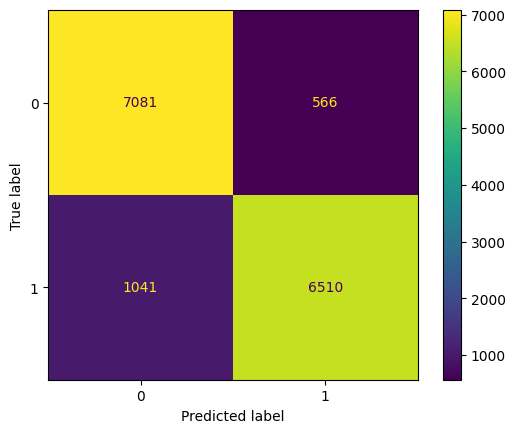

In [172]:
sgd_clf = SGDClassifier(loss="log_loss", random_state=0, early_stopping=True, n_jobs=-1, verbose=1)
sgd_clf.fit(X_train, y_train)
y_pred = sgd_clf.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [173]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred, labels=[0, 1]).ravel()

accuracy_regular = accuracy_score(y_test, y_pred)
print('True Positive:', tp)
print('True Negative:', tn)
print('False Positive:', fp)
print('False Negative:', fn)
print("Accuracy:", accuracy_regular)

True Positive: 6510
True Negative: 7081
False Positive: 566
False Negative: 1041
Accuracy: 0.8942624029477563


#### Applying evasion attack on the SGD Classifier

In [174]:
def evade(sample: np.ndarray, coef: np.ndarray) -> np.ndarray:
    """Applies an evation attack where when a coefficient is negative,
    change the sample's value for that index to 1.

    Args:
        sample (np.ndarray): data saples of 0s and 1s
        coef (np.ndarray): coefficient values of the originally trained model.

    Returns:
        np.ndarray: evasion attack sample
    """
    sample_copy = sample.copy()
    mask = coef < 0
    sample_copy[mask] = 1
    return sample_copy

In [175]:
malicious_indices = np.where(y_test == 1)[0]
X_test_evaded = X_test.copy()

coef_arr = sgd_clf.coef_[0]

for i in range(len(X_test_evaded)):
    if y_test[i] == 1:
        X_test_evaded[i] = evade(X_test_evaded[i], coef_arr)
X_test_evaded

array([[1, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int8)

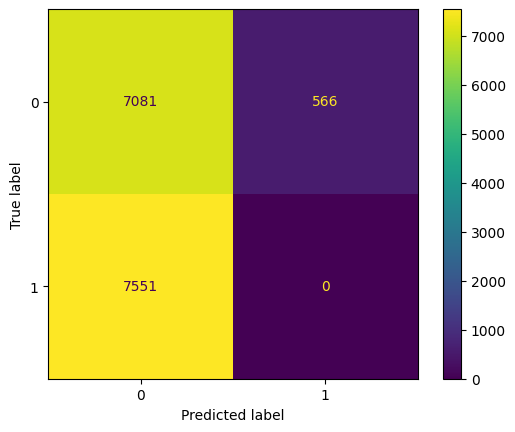

In [176]:
y_pred_evaded = sgd_clf.predict(X_test_evaded)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_evaded)
plt.show()

In [177]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_evaded, labels=[0, 1]).ravel()


accuracy_evaded = accuracy_score(y_test, y_pred_evaded)
print('True Positive:', tp)
print('True Negative:', tn)
print('False Positive:', fp)
print('False Negative:', fn)
print("Accuracy:", accuracy_evaded)

True Positive: 0
True Negative: 7081
False Positive: 566
False Negative: 7551
Accuracy: 0.4659165679694697


In [178]:
drop = 1.0 - (accuracy_evaded / accuracy_regular)
drop * 100

47.8993451548819

### 2b. Analysis and answers to the questions

For the AdvML dataset, we gave a balanced split of 50/50, just like the original paper. We implemented the `evade` function such that when the coefficient is negative, we change the position in the sample to 1.

From the performed experiments, we can see that the classifier is not robust against such attacks as the accuracy has dropped by ~53% and has accuracy of ~41.5%. The model could not detect any True Positives (malicious in prediction and reality). The malicious files started not being caught and hence were moved to the False Negative category. This is because neural networks are susceptible to small changes not present in the original dataset. It could not have seen these, and it is unreasonable to ask for it to learn 2<sup>22761</sup> combinations.

## 3. Improving robustness by hardening (5 Points)

### 3a. Implementing hardening

In [179]:
malicious_indices = np.where(y_test == 1)[0]
X_train_harden = np.zeros((len(malicious_indices), X_train.shape[1]))
y_train_harden = np.ones(len(malicious_indices))

for i, idx in enumerate(malicious_indices):
    X_train_harden[i] = evade(X_train[idx], coef_arr)

In [180]:
sgd_clf = SGDClassifier(loss="log_loss", random_state=0, early_stopping=True, n_jobs=-1, verbose=1)
sgd_clf.fit(X_train, y_train)
sgd_clf.partial_fit(X_train_harden, y_train_harden)

-- Epoch 1
Norm: 147.51, NNZs: 8949, Bias: 9.236085, T: 13678, Avg. loss: 16.160503
Total training time: 0.83 seconds.
-- Epoch 2
Norm: 92.65, NNZs: 8962, Bias: 4.048216, T: 27356, Avg. loss: 2.986621
Total training time: 1.69 seconds.
-- Epoch 3
Norm: 70.29, NNZs: 8962, Bias: 2.521127, T: 41034, Avg. loss: 1.680364
Total training time: 2.56 seconds.
-- Epoch 4
Norm: 59.10, NNZs: 8962, Bias: 2.306985, T: 54712, Avg. loss: 1.234767
Total training time: 3.44 seconds.
-- Epoch 5
Norm: 51.53, NNZs: 8962, Bias: 2.109058, T: 68390, Avg. loss: 0.933499
Total training time: 4.30 seconds.
-- Epoch 6
Norm: 45.79, NNZs: 8962, Bias: 2.229654, T: 82068, Avg. loss: 0.746832
Total training time: 5.18 seconds.
-- Epoch 7
Norm: 41.15, NNZs: 8962, Bias: 1.924825, T: 95746, Avg. loss: 0.620394
Total training time: 6.05 seconds.
-- Epoch 8
Norm: 37.65, NNZs: 8962, Bias: 2.123623, T: 109424, Avg. loss: 0.519264
Total training time: 6.92 seconds.
-- Epoch 9
Norm: 34.80, NNZs: 8962, Bias: 1.986571, T: 123102

SGDClassifier(early_stopping=True, loss='log_loss', n_jobs=-1, random_state=0,
              verbose=1)

#### Test with and without evasion

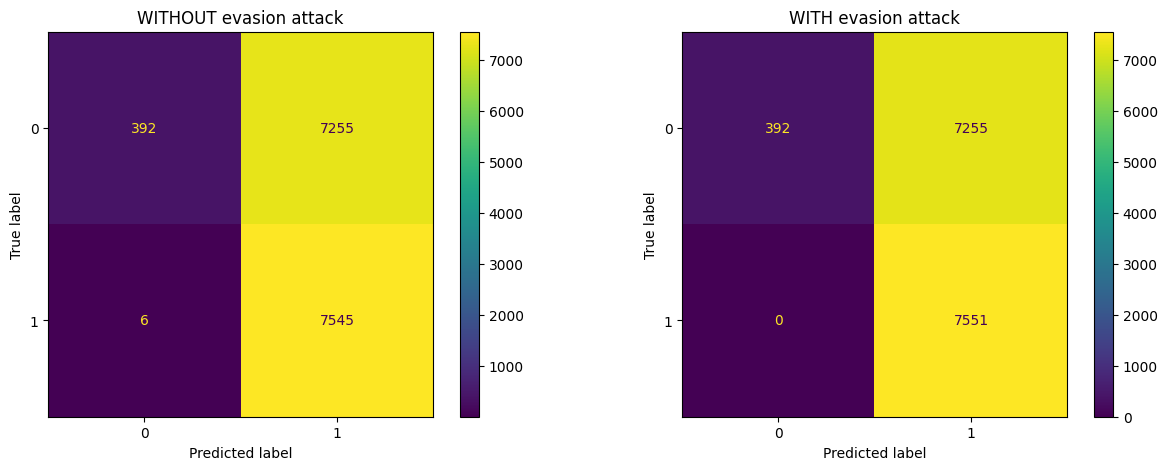

In [181]:
y_pred = sgd_clf.predict(X_test)
y_pred_evaded = sgd_clf.predict(X_test_evaded)

_, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax1)
ax1.set_title('WITHOUT evasion attack')
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_evaded, ax=ax2)
ax2.set_title('WITH evasion attack')
plt.show()

In [182]:
table = Table(title="SGDClassifier Test with data without and with evasion attack")
table.add_column("Evasion Attack", justify="center", style="cyan")
table.add_column("Accuracy", style="magenta")
table.add_column("Precision", style="magenta")
table.add_column("Recall", style="magenta")
table.add_column("F1", style="magenta")
table.add_column("TP", style="green")
table.add_column("TN", style="green")
table.add_column("FP", style="green")
table.add_column("FN", style="green")

types = ["No", "Yes"]
preds_type = [y_pred, y_pred_evaded]

for i, type_test in enumerate(types):
    tn, fp, fn, tp = confusion_matrix(y_test, preds_type[i], labels=[0, 1]).ravel()
    acc = accuracy_score(y_test, preds_type[i])
    precision = precision_score(y_test, preds_type[i])
    recall = recall_score(y_test, preds_type[i])
    f1_res = f1_score(y_test, preds_type[i])
    res_tuple = (type_test, f"{acc:.3f}", f"{precision:.3f}", f"{recall:.3f}", f"{f1_res:.3f}", f"{tp}", f"{tn}", f"{fp}", f"{fn}")
    table.add_row(*res_tuple)

console = Console()
console.print(table)

           SGDClassifier Test with data without and with evasion attack            
┏━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━┳━━━━━━┳━━━━┓
┃ Evasion Attack ┃ Accuracy ┃ Precision ┃ Recall ┃ F1    ┃ TP   ┃ TN  ┃ FP   ┃ FN ┃
┡━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━╇━━━━━╇━━━━━━╇━━━━┩
│       No       │ 0.522    │ 0.510     │ 0.999  │ 0.675 │ 7545 │ 392 │ 7255 │ 6  │
│      Yes       │ 0.523    │ 0.510     │ 1.000  │ 0.675 │ 7551 │ 392 │ 7255 │ 0  │
└────────────────┴──────────┴───────────┴────────┴───────┴──────┴─────┴──────┴────┘

### 3b. Analysis and answers to the questions

After applying evation to the train dataset, we can see that the regular test accuracy dropped to ~55.2% from ~88.6% while on the evaded dataset, the increased to ~55.3% compared to ~41.6% before. Also, as we can see in the regular test, we reduced the False Negatives to very small amount (6 samples) and for evation test, we decreased them to 0 False Negatives. This means that by adding evation attacks attacks help to improve the accuracy very slightly and catch all or most of the malitious files. However, as seen in this methods decreases the precision significantly which means that a lot of benign samples are classified as malitious. In practice, this would mean that there would be a lot of false alarms being raised which contributes to the Cyber-Security Analyst's alert fatigue.

## 4. Training non-negative linear models (5 Points)

### 4a. Implement non-negative logistic regression using SGD

In [183]:
def weight_clip(weights: np.ndarray) -> np.ndarray:
    """Clips weights to be non-negative.

    Args:
        weights (np.ndarray): 1D array of weights to clip

    Returns:
        np.ndarray: non-negative weights
    """
    return np.maximum(weights, 0.0)


def train_sdg_classifier(hardened_data: Tuple[np.ndarray, np.ndarray], epochs=20, batch_size=None, verbose=1) -> SGDClassifier:
    """Train a SGD classifier with clipped weights.

    Args:
        hardened_data (Tuple[np.ndarray, np.ndarray]): tuple of X and y data

    Returns:
        SGDClassifier: trained SGD classifier
    """
    X, y = hardened_data
    if batch_size is None:
        batch_size = len(X)
    clf = SGDClassifier(loss="log_loss", random_state=0, n_jobs=-1, verbose=verbose)
    for i in range(epochs):
        for j in track(range(0, len(X), batch_size), description=f"EPOCH: {i+1}/{epochs}"):
            clf.partial_fit(X[j:j+batch_size], y[j:j+batch_size], classes=[0, 1])
            clf.coef_[0] = weight_clip(clf.coef_[0])
        y_pred = clf.predict(X)
        print("Accuracy:", accuracy_score(y, y_pred))
        print("=================================")
    return clf

In [184]:
clipped_sgd_clf = train_sdg_classifier((X_train, y_train))

Output()

-- Epoch 1

Norm: 141.04, NNZs: 9662, Bias: 7.000600, T: 15198, Avg. loss: 15.128011

Total training time: 0.94 seconds.

Output()

Accuracy: 0.5039478878799842


-- Epoch 1

Norm: 81.89, NNZs: 9756, Bias: 2.476286, T: 15198, Avg. loss: 2.957064

Total training time: 0.94 seconds.

Output()

Accuracy: 0.5039478878799842


-- Epoch 1

Norm: 59.77, NNZs: 9757, Bias: 2.037059, T: 15198, Avg. loss: 1.724267

Total training time: 0.94 seconds.

Output()

Accuracy: 0.5039478878799842


-- Epoch 1

Norm: 49.00, NNZs: 9757, Bias: 1.405419, T: 15198, Avg. loss: 1.182129

Total training time: 0.95 seconds.

Output()

Accuracy: 0.5039478878799842


-- Epoch 1

Norm: 41.08, NNZs: 9757, Bias: 1.156071, T: 15198, Avg. loss: 0.901668

Total training time: 0.93 seconds.

Output()

Accuracy: 0.5039478878799842


-- Epoch 1

Norm: 36.24, NNZs: 9757, Bias: 1.080919, T: 15198, Avg. loss: 0.745170

Total training time: 0.98 seconds.

Output()

Accuracy: 0.5039478878799842


-- Epoch 1

Norm: 32.43, NNZs: 9757, Bias: 0.843827, T: 15198, Avg. loss: 0.624004

Total training time: 0.95 seconds.

Output()

Accuracy: 0.5039478878799842


-- Epoch 1

Norm: 29.64, NNZs: 9757, Bias: 0.746640, T: 15198, Avg. loss: 0.540962

Total training time: 0.95 seconds.

Output()

Accuracy: 0.5039478878799842


-- Epoch 1

Norm: 27.30, NNZs: 9757, Bias: 0.680676, T: 15198, Avg. loss: 0.481390

Total training time: 0.96 seconds.

Output()

Accuracy: 0.5039478878799842


-- Epoch 1

Norm: 25.59, NNZs: 9757, Bias: 0.615822, T: 15198, Avg. loss: 0.439341

Total training time: 1.05 seconds.

Output()

Accuracy: 0.5039478878799842


-- Epoch 1

Norm: 24.10, NNZs: 9757, Bias: 0.580521, T: 15198, Avg. loss: 0.403539

Total training time: 0.96 seconds.

Output()

Accuracy: 0.5039478878799842


-- Epoch 1

Norm: 22.96, NNZs: 9757, Bias: 0.537008, T: 15198, Avg. loss: 0.375780

Total training time: 0.96 seconds.

Output()

Accuracy: 0.5039478878799842


-- Epoch 1

Norm: 21.94, NNZs: 9757, Bias: 0.501718, T: 15198, Avg. loss: 0.352055

Total training time: 0.95 seconds.

Output()

Accuracy: 0.5039478878799842


-- Epoch 1

Norm: 21.07, NNZs: 9757, Bias: 0.471371, T: 15198, Avg. loss: 0.333266

Total training time: 0.98 seconds.

Output()

Accuracy: 0.5039478878799842


-- Epoch 1

Norm: 20.31, NNZs: 9757, Bias: 0.443735, T: 15198, Avg. loss: 0.317632

Total training time: 0.97 seconds.

Output()

Accuracy: 0.5039478878799842


-- Epoch 1

Norm: 19.67, NNZs: 9757, Bias: 0.418899, T: 15198, Avg. loss: 0.304209

Total training time: 0.96 seconds.

Output()

Accuracy: 0.5039478878799842


-- Epoch 1

Norm: 19.12, NNZs: 9757, Bias: 0.393567, T: 15198, Avg. loss: 0.293171

Total training time: 0.94 seconds.

Output()

Accuracy: 0.5039478878799842


-- Epoch 1

Norm: 18.64, NNZs: 9757, Bias: 0.370216, T: 15198, Avg. loss: 0.283855

Total training time: 0.96 seconds.

Output()

Accuracy: 0.5039478878799842


-- Epoch 1

Norm: 18.22, NNZs: 9757, Bias: 0.348672, T: 15198, Avg. loss: 0.275857

Total training time: 1.08 seconds.

Output()

Accuracy: 0.5039478878799842


-- Epoch 1

Norm: 17.85, NNZs: 9757, Bias: 0.328641, T: 15198, Avg. loss: 0.268965

Total training time: 0.98 seconds.

Accuracy: 0.5039478878799842


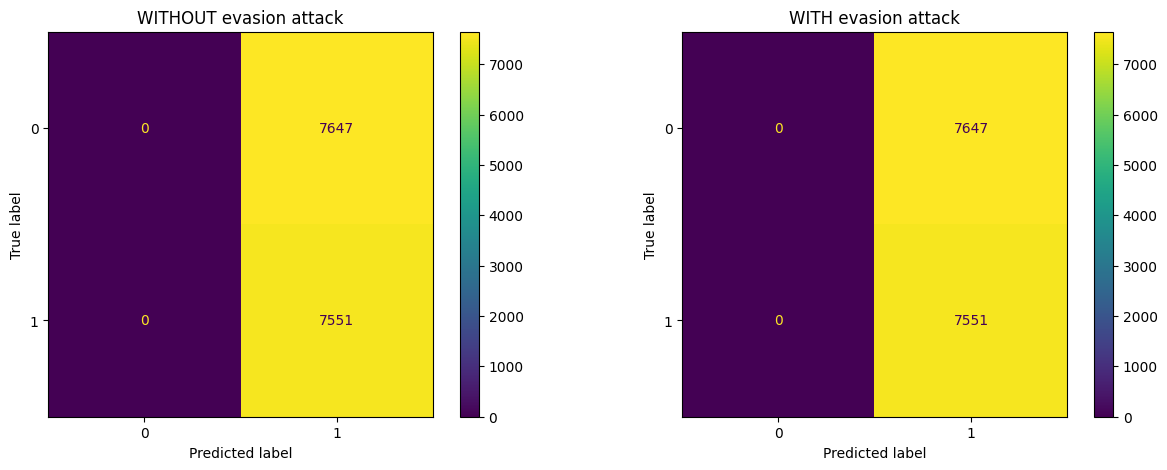

In [185]:
y_pred = clipped_sgd_clf.predict(X_test)
y_pred_evaded = clipped_sgd_clf.predict(X_test_evaded)

_, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax1)
ax1.set_title('WITHOUT evasion attack')
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_evaded, ax=ax2)
ax2.set_title('WITH evasion attack')
plt.show()

In [186]:
table = Table(title="SGDClassifier Test with data without and with evasion attack")
table.add_column("Evasion Attack", justify="center", style="cyan")
table.add_column("Accuracy", style="magenta")
table.add_column("Precision", style="magenta")
table.add_column("Recall", style="magenta")
table.add_column("F1", style="magenta")
table.add_column("TP", style="green")
table.add_column("TN", style="green")
table.add_column("FP", style="green")
table.add_column("FN", style="green")

types = ["No", "Yes"]
preds_type = [y_pred, y_pred_evaded]

for i, type_test in enumerate(types):
    tn, fp, fn, tp = confusion_matrix(y_test, preds_type[i], labels=[0, 1]).ravel()
    acc = accuracy_score(y_test, preds_type[i])
    precision = precision_score(y_test, preds_type[i])
    recall = recall_score(y_test, preds_type[i])
    f1_res = f1_score(y_test, preds_type[i])
    res_tuple = (type_test, f"{acc:.3f}", f"{precision:.3f}", f"{recall:.3f}", f"{f1_res:.3f}", f"{tp}", f"{tn}", f"{fp}", f"{fn}")
    table.add_row(*res_tuple)

console = Console()
console.print(table)

           SGDClassifier Test with data without and with evasion attack           
┏━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━┳━━━━┳━━━━━━┳━━━━┓
┃ Evasion Attack ┃ Accuracy ┃ Precision ┃ Recall ┃ F1    ┃ TP   ┃ TN ┃ FP   ┃ FN ┃
┡━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━╇━━━━╇━━━━━━╇━━━━┩
│       No       │ 0.497    │ 0.497     │ 1.000  │ 0.664 │ 7551 │ 0  │ 7647 │ 0  │
│      Yes       │ 0.497    │ 0.497     │ 1.000  │ 0.664 │ 7551 │ 0  │ 7647 │ 0  │
└────────────────┴──────────┴───────────┴────────┴───────┴──────┴────┴──────┴────┘

#### Batch based training

In [187]:
batch_sizes = [8, 16, 32, 64, 128, 256, 512, 1024]

trained_models = []
for batch_size in batch_sizes:
    print()
    print(f"+++++++++++++++++Train on batch_size={batch_size}+++++++++++++++++")
    print()
    trained_models.append(train_sdg_classifier((X_train, y_train), batch_size=batch_size, verbose=0))

Output()


+++++++++++++++++Train on batch_size=8+++++++++++++++++



Output()

Accuracy: 0.8409001184366364


Output()

Accuracy: 0.8495196736412686


Output()

Accuracy: 0.8539281484405843


Output()

Accuracy: 0.8583366232399


Output()

Accuracy: 0.8591919989472299


Output()

Accuracy: 0.8626135017765495


Output()

Accuracy: 0.8628108961705487


Output()

Accuracy: 0.8632056849585472


Output()

Accuracy: 0.8630740886958811


Output()

Accuracy: 0.8633372812212133


Output()

Accuracy: 0.8632056849585472


Output()

Accuracy: 0.8629424924332149


Output()

Accuracy: 0.8633372812212133


Output()

Accuracy: 0.8636004737465456


Output()

Accuracy: 0.8635346756152126


Output()

Accuracy: 0.8619555204632189


Output()

Accuracy: 0.8619555204632189


Output()

Accuracy: 0.8618897223318858


Output()

Accuracy: 0.8618897223318858


Output()

Accuracy: 0.8619555204632189

+++++++++++++++++Train on batch_size=16+++++++++++++++++



Output()

Accuracy: 0.6796946966706146


Output()

Accuracy: 0.7070667193051717


Output()

Accuracy: 0.7331227793130675


Output()

Accuracy: 0.7358205026977234


Output()

Accuracy: 0.7441768653770233


Output()

Accuracy: 0.7447032504276878


Output()

Accuracy: 0.7609553888669561


Output()

Accuracy: 0.7644426898276089


Output()

Accuracy: 0.7687195683642585


Output()

Accuracy: 0.7745098039215687


Output()

Accuracy: 0.7768785366495592


Output()

Accuracy: 0.7887879984208448


Output()

Accuracy: 0.8164232135807343


Output()

Accuracy: 0.8193183313593894


Output()

Accuracy: 0.8233320173707067


Output()

Accuracy: 0.8280036846953547


Output()

Accuracy: 0.8324779576260034


Output()

Accuracy: 0.8366232398999869


Output()

Accuracy: 0.8551125148045795


Output()

Accuracy: 0.8578760363205685

+++++++++++++++++Train on batch_size=32+++++++++++++++++



Output()

Accuracy: 0.7146335044084748


Output()

Accuracy: 0.7822081852875379


Output()

Accuracy: 0.788919594683511


Output()

Accuracy: 0.7894459797341755


Output()

Accuracy: 0.7937886564021582


Output()

Accuracy: 0.8016844321621266


Output()

Accuracy: 0.8413607053559679


Output()

Accuracy: 0.8547177260165811


Output()

Accuracy: 0.8564942755625741


Output()

Accuracy: 0.8584682195025661


Output()

Accuracy: 0.8573496512699039


Output()

Accuracy: 0.8562968811685748


Output()

Accuracy: 0.856428477431241


Output()

Accuracy: 0.8572838531385709


Output()

Accuracy: 0.8624161073825504


Output()

Accuracy: 0.8637978681405448


Output()

Accuracy: 0.8679431504145282


Output()

Accuracy: 0.8679431504145282


Output()

Accuracy: 0.8677457560205291


Output()

Accuracy: 0.8683379392025267

+++++++++++++++++Train on batch_size=64+++++++++++++++++



Output()

Accuracy: 0.6150151335702067


Output()

Accuracy: 0.7718778786682459


Output()

Accuracy: 0.7874062376628503


Output()

Accuracy: 0.7878668245821818


Output()

Accuracy: 0.7864192656928544


Output()

Accuracy: 0.7993814975654692


Output()

Accuracy: 0.8112909593367549


Output()

Accuracy: 0.8167522042373997


Output()

Accuracy: 0.8202395051980523


Output()

Accuracy: 0.8214896696933807


Output()

Accuracy: 0.8234636136333728


Output()

Accuracy: 0.8496512699039347


Output()

Accuracy: 0.8487958941966048


Output()

Accuracy: 0.8530069746019213


Output()

Accuracy: 0.8556388998552441


Output()

Accuracy: 0.8550467166732465


Output()

Accuracy: 0.8568232662192393


Output()

Accuracy: 0.8566916699565732


Output()

Accuracy: 0.8579418344519015


Output()

Accuracy: 0.8599815765232267

+++++++++++++++++Train on batch_size=128+++++++++++++++++



Output()

Accuracy: 0.5824450585603369


Output()

Accuracy: 0.7135149361758126


Output()

Accuracy: 0.7156862745098039


Output()

Accuracy: 0.7332543755757337


Output()

Accuracy: 0.7332543755757337


Output()

Accuracy: 0.7472693775496776


Output()

Accuracy: 0.7481905513883406


Output()

Accuracy: 0.7525990261876563


Output()

Accuracy: 0.7867482563495197


Output()

Accuracy: 0.8162916173180682


Output()

Accuracy: 0.8195157257533886


Output()

Accuracy: 0.8210948809053823


Output()

Accuracy: 0.8212922752993815


Output()

Accuracy: 0.8218844584813791


Output()

Accuracy: 0.8224766416633768


Output()

Accuracy: 0.8233320173707067


Output()

Accuracy: 0.8260955388866956


Output()

Accuracy: 0.8303724174233452


Output()

Accuracy: 0.8333991314646664


Output()

Accuracy: 0.8345834978286617

+++++++++++++++++Train on batch_size=256+++++++++++++++++



Output()

Accuracy: 0.5727069351230425


Output()

Accuracy: 0.5952098960389525


Output()

Accuracy: 0.6045532306882484


Output()

Accuracy: 0.7200947493091197


Output()

Accuracy: 0.7206869324911173


Output()

Accuracy: 0.7193709698644558


Output()

Accuracy: 0.7243058297144361


Output()

Accuracy: 0.7238452427951046


Output()

Accuracy: 0.7291090933017502


Output()

Accuracy: 0.7592446374522963


Output()

Accuracy: 0.7622055533622845


Output()

Accuracy: 0.7660876431109357


Output()

Accuracy: 0.7675352020002632


Output()

Accuracy: 0.7668772206869325


Output()

Accuracy: 0.7650348730096065


Output()

Accuracy: 0.7731938412949072


Output()

Accuracy: 0.7734570338202396


Output()

Accuracy: 0.7736544282142387


Output()

Accuracy: 0.7738518226082379


Output()

Accuracy: 0.7765495459928938

+++++++++++++++++Train on batch_size=512+++++++++++++++++



Output()

Accuracy: 0.5039478878799842


Output()

Accuracy: 0.5039478878799842


Output()

Accuracy: 0.5023687327279905


Output()

Accuracy: 0.5036188972233189


Output()

Accuracy: 0.5079615738913015


Output()

Accuracy: 0.5148703776812739


Output()

Accuracy: 0.5215159889459139


Output()

Accuracy: 0.5268456375838926


Output()

Accuracy: 0.5527043031977892


Output()

Accuracy: 0.5538886695617844


Output()

Accuracy: 0.5671140939597316


Output()

Accuracy: 0.5815896828530069


Output()

Accuracy: 0.5830372417423345


Output()

Accuracy: 0.5840242137123306


Output()

Accuracy: 0.5845505987629951


Output()

Accuracy: 0.5849453875509936


Output()

Accuracy: 0.5914594025529675


Output()

Accuracy: 0.5969206474536123


Output()

Accuracy: 0.5981708119489406


Output()

Accuracy: 0.5982366100802737

+++++++++++++++++Train on batch_size=1024+++++++++++++++++



Output()

Accuracy: 0.5084879589419661


Output()

Accuracy: 0.5026319252533228


Output()

Accuracy: 0.5139492038426109


Output()

Accuracy: 0.5138834057112778


Output()

Accuracy: 0.5150677720752731


Output()

Accuracy: 0.5176996973285959


Output()

Accuracy: 0.5191472562179235


Output()

Accuracy: 0.5245427029872352


Output()

Accuracy: 0.5250032899065666


Output()

Accuracy: 0.5251348861692328


Output()

Accuracy: 0.5259244637452296


Output()

Accuracy: 0.5269772338465588


Output()

Accuracy: 0.5273720226345572


Output()

Accuracy: 0.5280300039478879


Output()

Accuracy: 0.5285563889985524


Output()

Accuracy: 0.5288195815238848


Output()

Accuracy: 0.5289511777865509


Output()

Accuracy: 0.5294775628372155


Output()

Accuracy: 0.5335570469798657


Accuracy: 0.533688643242532


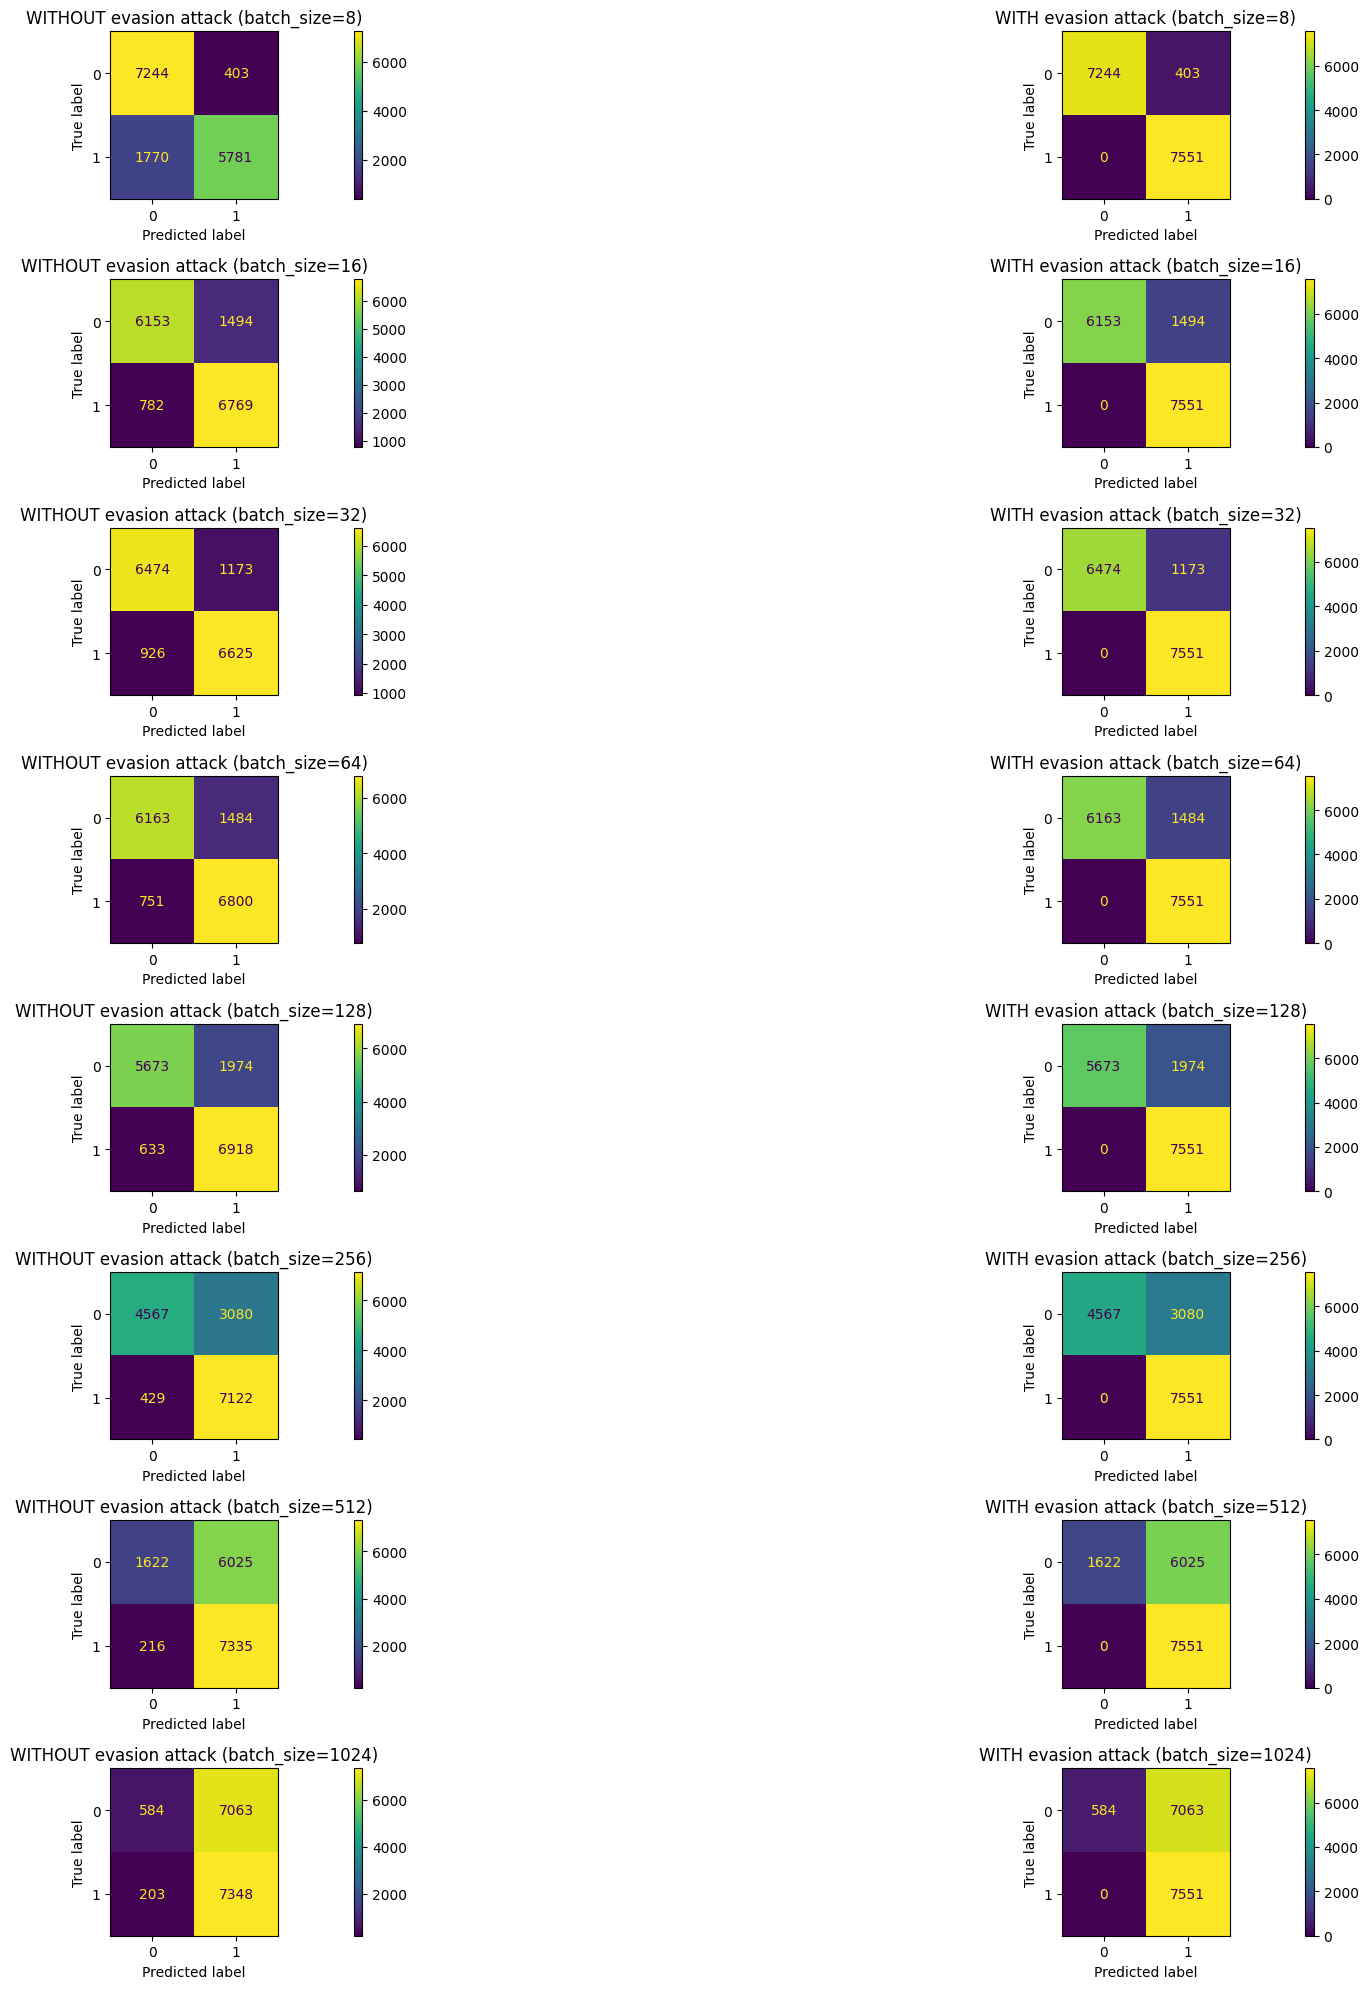

In [188]:
_, ax = plt.subplots(len(batch_sizes), 2, figsize=(25, 20))

for i, batch_size in enumerate(batch_sizes):
    y_pred = trained_models[i].predict(X_test)
    y_pred_evaded = trained_models[i].predict(X_test_evaded)

    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax[i, 0])
    ax[i, 0].set_title(f'WITHOUT evasion attack (batch_size={batch_size})')
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred_evaded, ax=ax[i, 1])
    ax[i, 1].set_title(f'WITH evasion attack (batch_size={batch_size})')
plt.tight_layout()
plt.show()

In [189]:
table = Table(title="SGDClassifier Test with data without and with evasion attack on different batches")
table.add_column("Evasion Attack", justify="center", style="cyan")
table.add_column("Batch Size", justify="center", style="red")
table.add_column("Accuracy", style="magenta")
table.add_column("Precision", style="magenta")
table.add_column("Recall", style="magenta")
table.add_column("F1", style="magenta")
table.add_column("TP", style="green")
table.add_column("TN", style="green")
table.add_column("FP", style="green")
table.add_column("FN", style="green")

types = ["No", "Yes"]


for i, batch_size in enumerate(batch_sizes):
    y_pred = trained_models[i].predict(X_test)
    y_pred_evaded = trained_models[i].predict(X_test_evaded)
    preds_type = [y_pred, y_pred_evaded]

    for i, type_test in enumerate(types):
        tn, fp, fn, tp = confusion_matrix(y_test, preds_type[i], labels=[0, 1]).ravel()
        acc = accuracy_score(y_test, preds_type[i])
        precision = precision_score(y_test, preds_type[i])
        recall = recall_score(y_test, preds_type[i])
        f1_res = f1_score(y_test, preds_type[i])
        res_tuple = (type_test, f"{batch_size}", f"{acc:.3f}", f"{precision:.3f}", f"{recall:.3f}", f"{f1_res:.3f}", f"{tp}", f"{tn}", f"{fp}", f"{fn}")
        table.add_row(*res_tuple)

console = Console()
console.print(table)

         SGDClassifier Test with data without and with evasion attack on different batches         
┏━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┓
┃ Evasion Attack ┃ Batch Size ┃ Accuracy ┃ Precision ┃ Recall ┃ F1    ┃ TP   ┃ TN   ┃ FP   ┃ FN   ┃
┡━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━┩
│       No       │     8      │ 0.857    │ 0.935     │ 0.766  │ 0.842 │ 5781 │ 7244 │ 403  │ 1770 │
│      Yes       │     8      │ 0.973    │ 0.949     │ 1.000  │ 0.974 │ 7551 │ 7244 │ 403  │ 0    │
│       No       │     16     │ 0.850    │ 0.819     │ 0.896  │ 0.856 │ 6769 │ 6153 │ 1494 │ 782  │
│      Yes       │     16     │ 0.902    │ 0.835     │ 1.000  │ 0.910 │ 7551 │ 6153 │ 1494 │ 0    │
│       No       │     32     │ 0.862    │ 0.850     │ 0.877  │ 0.863 │ 6625 │ 6474 │ 1173 │ 926  │
│      Yes       │     32     │ 0.923    │ 0.866     │ 1.000  │ 0.928 │ 7551 │ 6474 │ 1173 │ 0    │
│       No       │     64     │ 0.853    │ 0.821     │ 0.901  │ 0.859 │ 6800 │ 6163 │ 1484 │ 751  │
│      Yes       │     64     │ 0.902    │ 0.836     │ 1.000  │ 0.911 │ 7551 │ 6163 │ 1484 │ 0    │
│       No       │    128     │ 0.828    │ 0.778     │ 0.916  │ 0.841 │ 6918 │ 5673 │ 1974 │ 633  │
│      Yes       │    128     │ 0.870    │ 0.793     │ 1.000  │ 0.884 │ 7551 │ 5673 │ 1974 │ 0    │
│       No       │    256     │ 0.769    │ 0.698     │ 0.943  │ 0.802 │ 7122 │ 4567 │ 3080 │ 429  │
│      Yes       │    256     │ 0.797    │ 0.710     │ 1.000  │ 0.831 │ 7551 │ 4567 │ 3080 │ 0    │
│       No       │    512     │ 0.589    │ 0.549     │ 0.971  │ 0.702 │ 7335 │ 1622 │ 6025 │ 216  │
│      Yes       │    512     │ 0.604    │ 0.556     │ 1.000  │ 0.715 │ 7551 │ 1622 │ 6025 │ 0    │
│       No       │    1024    │ 0.522    │ 0.510     │ 0.973  │ 0.669 │ 7348 │ 584  │ 7063 │ 203  │
│      Yes       │    1024    │ 0.535    │ 0.517     │ 1.000  │ 0.681 │ 7551 │ 584  │ 7063 │ 0    │
└────────────────┴────────────┴──────────┴───────────┴────────┴───────┴──────┴──────┴──────┴──────┘

#### Epoch accuracy on test data over time

In [216]:
# Hardening accuracy collection
epochs_count = 1000
batch_size = 32
accuracies_harden = []

sgd_clf = SGDClassifier(loss="log_loss", random_state=0, n_jobs=-1)
sgd_clf.fit(X_train, y_train)
for epoch in track(range(epochs_count)):
    for j in range(0, len(X_train_harden), batch_size):
        sgd_clf.partial_fit(X_train_harden[j:j+batch_size], y_train_harden[j:j+batch_size], classes=[0, 1])
    y_pred = sgd_clf.predict(X_test_evaded)
    acc = accuracy_score(y_test, y_pred)
    accuracies_harden.append(acc)

Output()

In [217]:
# Non-negative model accuracy collection
accuracies_nonnegative = []
batch_size = 32

clf = SGDClassifier(loss="log_loss", random_state=0, n_jobs=-1, verbose=0)
for i in track(range(epochs_count)):
    for j in range(0, len(X_train), batch_size):
        clf.partial_fit(X_train[j:j+batch_size], y_train[j:j+batch_size], classes=[0, 1])
        clf.coef_[0] = weight_clip(clf.coef_[0])
    y_pred = clf.predict(X_test_evaded)
    acc = accuracy_score(y_test, y_pred)
    accuracies_nonnegative.append(acc)

Output()

In [219]:
# Comibation of hardening and Non-negative model accuracy collection
accuracies_combi = []
batch_size = 32

clf_combi = SGDClassifier(loss="log_loss", random_state=0, n_jobs=-1, verbose=0)
clf_combi.fit(X_train, y_train)
for i in track(range(epochs_count)):
    for j in range(0, len(X_train_harden), batch_size):
        clf_combi.partial_fit(X_train_harden[j:j+batch_size], y_train_harden[j:j+batch_size], classes=[0, 1])
    for j in range(0, len(X_train), batch_size):
        clf_combi.partial_fit(X_train[j:j+batch_size], y_train[j:j+batch_size], classes=[0, 1])
        clf_combi.coef_[0] = weight_clip(clf_combi.coef_[0])
    y_pred = clf_combi.predict(X_test_evaded)
    acc = accuracy_score(y_test, y_pred)
    accuracies_combi.append(acc)

Output()

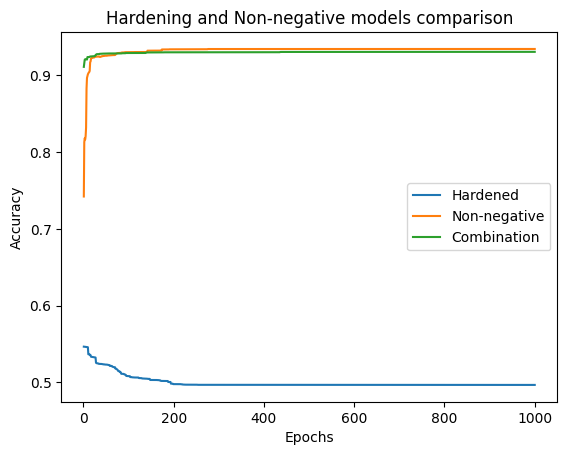

In [222]:
epochs_list = [i+1 for i in range(epochs_count)]
plt.plot(epochs_list, accuracies_harden, label='Hardened')
plt.plot(epochs_list, accuracies_nonnegative, label='Non-negative')
plt.plot(epochs_list, accuracies_combi, label='Combination')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Hardening and Non-negative models comparison')

plt.legend()

plt.show()

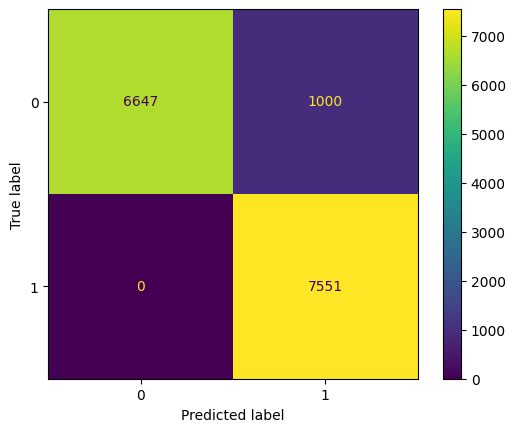

In [223]:
y_pred_non_neg = clf.predict(X_test_evaded)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_non_neg)
plt.show()

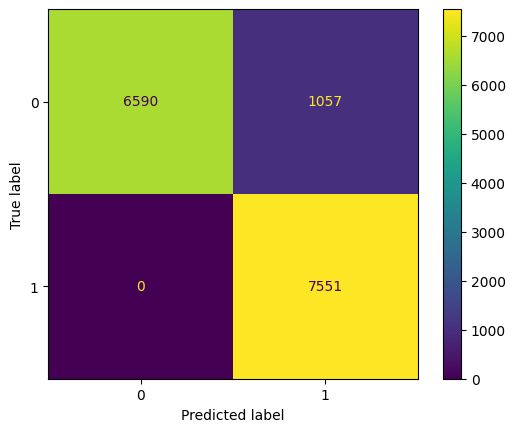

In [227]:
y_pred_combi = clf_combi.predict(X_test_evaded)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_combi)
plt.show()

In [226]:
print("accuracies_harden last 3:", accuracies_harden[-3:])
print("accuracies_nonnegative last 3:", accuracies_nonnegative[-3:])
print("accuracies_combi last 3:", accuracies_combi[-3:])

accuracies_harden last 3: [0.4968416896960126, 0.4968416896960126, 0.4968416896960126]
accuracies_nonnegative last 3: [0.9342018686669299, 0.9342018686669299, 0.9342018686669299]
accuracies_combi last 3: [0.9304513751809449, 0.9304513751809449, 0.9304513751809449]


### 4b. Analysis and answers to the questions.

As we can see from the first results, we can see that if we perform `partial_fit()` on whole data in one epoch, we can see that the model seems learn not classify to detect benign files and therefore resulted in a lot of false positives i.e. recall of `1.0` but a percision of `0.497`. Hence, we decided to first perform an experiment on training the model on smaller batch sizes that were in the powers of `2` as there are two classes. These were: `[8, 16, 32, 64, 128, 256, 512, 1024]`. From the experimets, we can see that we can achive the one of the better accuracy scores with the least amount of False positives at batch size `32` and that for every evaded test data, we can see that there are no false negatives. Also, from these experiments we can tell that the model is more robust than the regular and hardened models. After that, we trained tree models: hardened, non-negative and model that combines both techniques.

From the epoch experiment, we can see that non-negative model outperforms the hardened model drastically as setting weights to between `[0, inf)` as it stabalises training as large weight updates are prevented whereas with regular hardening, we train the network to its convergence limit and apply a small subset of "hardened" data which causes to overfit the accuracy to drop. The combination and non-negative model flatten at around 200 epoch and interestingly enough, even though combination model has a better head start (as it used to imporve and already trained model), it gets outperformed by the non-negative model. Combi model seems overfitting on hardened data and clipping seem to cancel each other out which causes to have a little more False Positives than negative model.

## 5. Bonus: robust decision trees for fraud detection (5 Points)

### 5a. Train and analyze a regular decision tree for fraud detection

### 5b. Train and analyze a robust decision tree (GROOT) for fraud detection

### 5c. Evaluate the robustness of the two models